In [110]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [111]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [112]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [35]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [39]:
import collections
counter = collections.Counter(y_test)

In [40]:
counter

Counter({9: 1000,
         2: 1000,
         1: 1000,
         6: 1000,
         4: 1000,
         5: 1000,
         7: 1000,
         3: 1000,
         8: 1000,
         0: 1000})

In [15]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

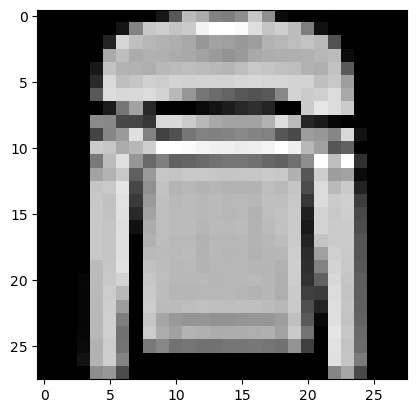

In [20]:
plt.imshow(x_train[5], cmap="gray")
plt.show()

In [25]:
x_train.shape

(60000, 28, 28)

# Processing the date

In [113]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

# One Hot Encoading

In [115]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [116]:
print(x_train[1].size)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

784
(60000, 10)
(10000, 784)
(10000, 10)


In [32]:
print(y_train[1])
print(y_train_ohe[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Model Building

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L1L2

In [142]:
model = Sequential() # Empty Model without any layers
model.add(Input(shape=(784,)))
#model.add(Dense(units=50, activation="relu", kernel_regularizer = L1L2(l1=0, l2=0.01)))
model.add(Dense(10, activation = "softmax",kernel_regularizer = L1L2(l1=0, l2=0.01)))

In [143]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [144]:
model.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe), epochs=50, batch_size=1000)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4166 - loss: 6962.3276 - val_accuracy: 0.6801 - val_loss: 3792.9231
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7012 - loss: 1976.9286 - val_accuracy: 0.6629 - val_loss: 3692.3721
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7318 - loss: 1451.6481 - val_accuracy: 0.7166 - val_loss: 964.9722
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7398 - loss: 1328.6500 - val_accuracy: 0.7263 - val_loss: 990.0480
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7413 - loss: 1279.1063 - val_accuracy: 0.7856 - val_loss: 738.3496
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7453 - loss: 1274.1481 - val_accuracy: 0.7692 - val_loss: 959.2767
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7683 - loss: 1018.4205 - val_accuracy: 0.7768 - val_loss: 768.0803
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7589 - loss: 113

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7901 - loss: 935.2248 - val_accuracy: 0.8011 - val_loss: 608.1874


In [145]:
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

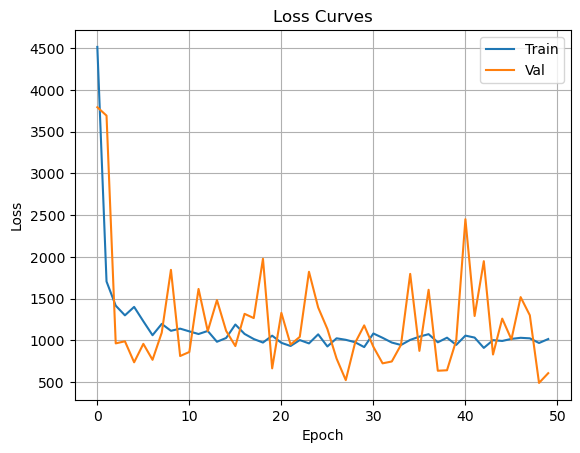

In [146]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

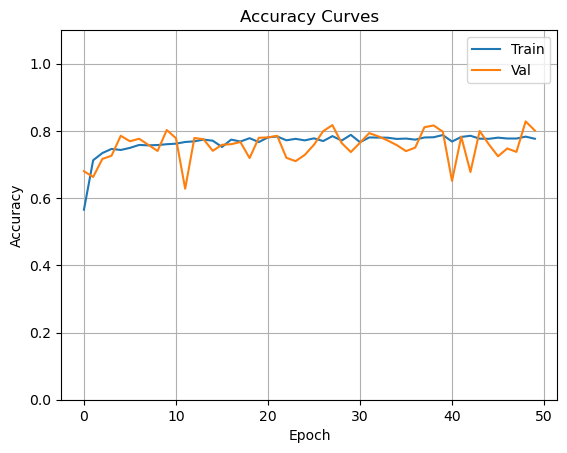

In [147]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.title("Accuracy Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

In [148]:
from sklearn.metrics import confusion_matrix, classification_report
preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
preds.shape

(10000, 10)

In [50]:
preds[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [149]:
np.argmax(preds[1])
preds_class = np.argmax(preds, axis=1)

In [84]:
preds_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [53]:
np.argmax(preds[1])

6

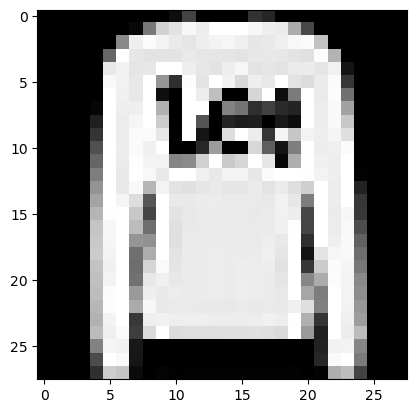

In [54]:
plt.imshow(x_test[1].reshape(28,28), cmap="gray")
plt.show()

In [55]:
y_test[1]

2

In [150]:
confusion_matrix(y_test, preds_class)

array([[764,  22,   6,  10,   9,   0, 174,   0,  15,   0],
       [  1, 969,   0,  14,   6,   0,   9,   0,   1,   0],
       [  9,   8, 454,   3, 204,   1, 307,   1,  13,   0],
       [ 40,  74,   4, 681,  47,   1, 138,   0,  15,   0],
       [  0,   9,  31,   6, 731,   0, 216,   0,   7,   0],
       [  1,   1,   0,   0,   0, 904,   1,  48,   8,  37],
       [116,  11,  40,  10,  76,   0, 730,   0,  17,   0],
       [  0,   0,   0,   0,   0,  48,   0, 916,   0,  36],
       [  4,   0,   0,   2,   8,   5,  46,   5, 930,   0],
       [  0,   0,   0,   0,   0,  25,   2,  41,   0, 932]], dtype=int64)

In [151]:
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1000
           1       0.89      0.97      0.93      1000
           2       0.85      0.45      0.59      1000
           3       0.94      0.68      0.79      1000
           4       0.68      0.73      0.70      1000
           5       0.92      0.90      0.91      1000
           6       0.45      0.73      0.56      1000
           7       0.91      0.92      0.91      1000
           8       0.92      0.93      0.93      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.80     10000
   macro avg       0.83      0.80      0.80     10000
weighted avg       0.83      0.80      0.80     10000

